This example was taken from the book **The Essence of Chaos** by *Edward Lorenz*. 

$$\frac{dx}{dt} = u, \ \frac{dy}{dt} = v, \ \frac{dz}{dt} = w.$$

\begin{align}
\frac{du}{dt} &= -F \partial_x H - cu, \\
\frac{dv}{dt} &= -F \partial_y H - cv, \\
\frac{dw}{dt} &= -g + F - cw.
\end{align}

and

\begin{align}
\frac{d \vec{u}}{dt} &= -F \nabla H - c \vec{u}, \\
\end{align}

$$H(x,y) = -ax - b \ cos(px) \ cos(qy)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
a = 0.25
b = 0.4
q = (2*np.pi)/4.0
p = (2*np.pi)/10.0

def H_test(x,y):
    return -a*x - b*np.cos(p*x)*np.cos(q*y) 

def humps(x,y):
    return - b*np.cos(p*x)*np.cos(q*y) 

In [152]:
x_range = np.linspace(0, 40, 200)
y_range = np.linspace(-10, 10, 200)

In [153]:
XX, YY = np.meshgrid(x_range, y_range)

In [162]:
moguls = H_test(XX, YY)
top_humps = humps(XX,YY)

In [163]:
moguls

array([[ 0.4       ,  0.34656289,  0.28680481, ..., -9.51219017,
        -9.5529346 , -9.6       ],
       [ 0.39502582,  0.34162833,  0.28198847, ..., -9.51700651,
        -9.55786916, -9.60497418],
       [ 0.380227  ,  0.32694737,  0.26765924, ..., -9.53133574,
        -9.57255012, -9.619773  ],
       ...,
       [ 0.380227  ,  0.32694737,  0.26765924, ..., -9.53133574,
        -9.57255012, -9.619773  ],
       [ 0.39502582,  0.34162833,  0.28198847, ..., -9.51700651,
        -9.55786916, -9.60497418],
       [ 0.4       ,  0.34656289,  0.28680481, ..., -9.51219017,
        -9.5529346 , -9.6       ]])

In [164]:
from mpl_toolkits.mplot3d import Axes3D

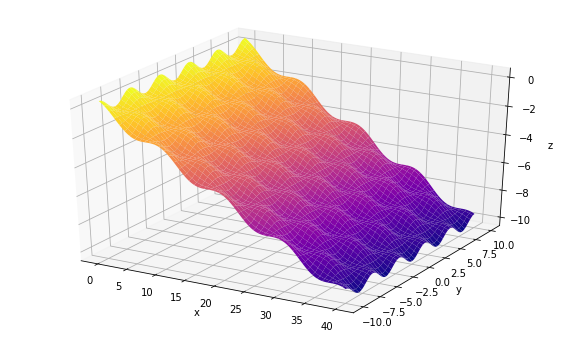

In [165]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')

ax.plot_surface(XX, YY, moguls, cmap = 'plasma')

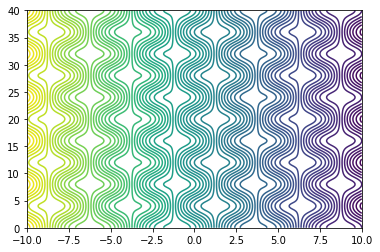

In [180]:
plt.contour(YY, XX, moguls.T, levels = 100)

In [31]:
from scipy.integrate import solve_ivp

In [55]:
def slopez(t, X_0):
    print(X_0)
    x0 = np.copy(X_0[0])
    y0 = np.copy(X_0[1])
    u0 = np.copy(X_0[2])
    v0 = np.copy(X_0[3])
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p**2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q**2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0**2 + 2*H_xy*u0*v0 + H_yy*v0**2)/(1 + H_x**2 + H_y**2)
    
    dU = -F*H_x - c*u0
    dV = -F*H_y - c*v0
    
    return np.array([u0, v0, dU, dV])

In [117]:
t_f = 15

sol_1 = solve_ivp(slopez, [0, t_f], [0,-1,4,2])
sol_2 = solve_ivp(slopez, [0, t_f], [0,0.0,4,2])
sol_3 = solve_ivp(slopez, [0, t_f], [0,1,4,2])
sol_4 = solve_ivp(slopez, [0, t_f], [0,2,4,2])

[ 0. -1.  4.  2.]
[ 1.73104089e-05 -9.99991345e-01  3.99999766e+00  2.00001553e+00]
[ 3.46208179e-04 -9.99826896e-01  3.99995330e+00  2.00031054e+00]
[ 5.19307721e-04 -9.99740314e-01  3.99993000e+00  2.00046598e+00]
[ 1.38480047e-03 -9.99307368e-01  3.99981360e+00  2.00124334e+00]
[ 1.53866329e-03 -9.99230382e-01  3.99979294e+00  2.00138163e+00]
[ 1.73099058e-03 -9.99134143e-01  3.99976713e+00  2.00155453e+00]
[ 1.73099046e-03 -9.99134143e-01  3.99976713e+00  2.00155453e+00]
[ 0.00519287 -0.99740176  3.99930271  2.00466723]
[ 0.00692336 -0.99653253  3.99907642  2.00623996]
[ 0.01557539 -0.99218279  3.99795166  2.01412226]
[ 0.01711335 -0.99140749  3.9977552   2.01553331]
[ 0.01903558 -0.99043793  3.99751105  2.01730103]
[ 0.01903546 -0.99043827  3.997511    2.01730085]
[ 0.05363474 -0.97297812  3.99313117  2.04916125]
[ 0.07089173 -0.96393782  3.99154487  2.06677938]
[ 0.15722217 -0.91813188  3.98440149  2.15721542]
[ 0.17263671 -0.9095535   3.98355259  2.17452295]
[ 0.19177857 -0.8990

[7.00201072 2.93026508 3.10375698 2.01135165]
[7.00543477 2.89544842 3.09588297 1.98082977]
[7.37599301 3.13254162 3.00853597 1.74690685]
[7.54951037 3.21958918 3.03972085 1.74144732]
[8.56331903 3.85709207 3.15362958 1.71582528]
[8.91831416 4.21142103 2.71805633 1.78357081]
[9.19268841 4.29910387 3.1160277  2.37074902]
[8.94010001 3.98191812 3.899066   1.92773212]
[7.22932083 3.03869679 3.04310914 1.83949684]
[7.33697035 3.09882254 3.03885451 1.81027972]
[7.89890151 3.43996431 3.03645574 1.66859924]
[8.02545221 3.55176806 2.97275088 1.60862849]
[8.15268351 3.6175804  3.01638905 1.62798437]
[8.11220092 3.5371638  3.1578801  1.71128453]
[8.39889095 3.69252379 3.28769924 1.7480411 ]
[8.55549489 3.77395788 3.44259746 1.79839282]
[9.49848538 4.23690355 4.37477327 1.76014771]
[9.81194014 4.41613441 4.96938919 2.1150096 ]
[9.99166424 4.44269054 5.15157281 1.81409159]
[9.81675731 4.29319912 4.42618008 1.14539552]
[8.3058296  3.64209298 3.24555915 1.73610969]
[8.40869208 3.69627002 3.32950612 

[18.59891156  6.10933763  3.223052   -0.73871323]
[18.80634417  6.06179474  3.12544067 -0.66900938]
[18.90299303  6.04307013  3.09493167 -0.65567642]
[19.39931896  5.93043351  2.95737073 -0.59196757]
[19.50494762  5.88668145  2.93067138 -0.54121078]
[19.60871386  5.86407668  2.92108877 -0.55226223]
[19.57949911  5.90173897  2.94148346 -0.639949  ]
[19.81090258  5.85139484  2.92301406 -0.68186123]
[19.92496973  5.82251343  2.93808546 -0.73762087]
[20.52748278  5.62531012  2.98219995 -1.02420027]
[20.67441398  5.53572592  2.94344021 -1.05325152]
[20.80701275  5.48758232  2.97089285 -1.12845608]
[20.74760962  5.56160478  3.05851855 -1.1976866 ]
[21.05007046  5.443164    3.13136466 -1.41563278]
[21.20940521  5.35969652  3.20465548 -1.5742493 ]
[22.07989977  4.82814137  3.68360889 -2.63433216]
[22.29411117  4.66243745  4.02070038 -3.431605  ]
[22.47191387  4.5747344   4.19192029 -3.67114967]
[22.41361415  4.61921423  3.71175849 -2.5593486 ]
[20.99409215  5.46508458  3.11788258 -1.37529613]


[10.6824851   8.56841619  4.93541416 -0.33999793]
[10.85598075  8.52914241  4.90329522 -0.55230766]
[11.04145131  8.5220791   4.55185786 -0.83611549]
[11.45085832  8.44687651  4.4717901  -1.27351258]
[11.64746011  8.36501688  4.3814436  -1.37740703]
[12.54101809  8.09011272  3.52212382 -0.66316686]
[12.66044047  8.05500985  2.71631816  1.19416201]
[12.89013709  7.86596934  2.63013599  1.19692262]
[12.9055085   7.91273058  3.61989246 -1.40929062]
[11.3876851   8.45848058  4.48414489 -1.20602038]
[11.55500764  8.3950277   4.41577503 -1.31404533]
[12.33851131  8.14661812  3.81138419 -1.08027905]
[12.45240225  8.11227454  3.32919722 -0.08045052]
[12.63749112  7.99413359  3.2225025  -0.0266792 ]
[12.64972391  8.00963772  3.78130133 -1.43403293]
[12.99164336  7.87996708  3.55729949 -1.36825331]
[13.13981611  7.82182331  3.48286411 -1.37385809]
[13.91574889  7.47665815  3.14117204 -1.52245128]
[14.10250561  7.36733117  3.09580973 -1.65141654]
[14.25126224  7.29941573  3.05240547 -1.72490788]


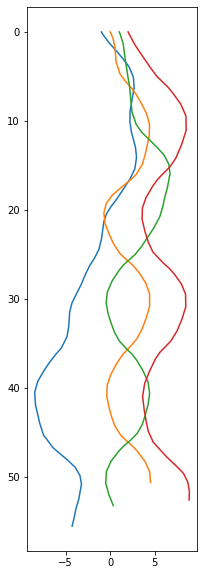

In [191]:
plt.figure(figsize=(5,10))
plt.plot(sol_1.y[1], sol_1.y[0])
plt.plot(sol_2.y[1], sol_2.y[0])
plt.plot(sol_3.y[1], sol_3.y[0])
plt.plot(sol_4.y[1], sol_4.y[0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
class Moguls:
    
    def __init__( self, nmembers = 1):
        
        self.a = 0.25
        self.b = 0.5
        self.q = (2*np.pi)/4.0
        self.p = (2*np.pi)/10.0
        self.nmembers = nmembers
        
    def dx(x0):
        return u0

    def dy(y0):
        return v0

    def dU(u0, F, H_x, c):
        return -F*H_x - c*u0

    def dV(v0, F, H_y, c):
        return -F*H_y - c*v0
